In this project I will be using relatively basic summary statistics to identify the best markets for advertising an e-learning company that offers programming courses. 

Basic assumptions for this project:
* The e-learning company's courses focus on web and mobile development, but some courses are also about data science, game development, and other areas.
* The e-learning company wants to start by identifying the *two* most promising markets for their product
* A subscription to the platform costs $59

# Dataset used in this project
I will be using data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Free Code Camp runs a popular Medium publication, so their survey attracted a relatively wide of new coders
The dataset can be obtained [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

# Reading in and Inspecting the Data

In [1]:
# Reading in data
import pandas as pd
import matplotlib.pyplot as plt
import re

survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are interested in the locations of the survey population, the locations with greatest number of new coders and how much money potential clients would be interested to spend.
The dataset has a large number of variables that are not of interest for this project so we will filter out only a selected number of columns.

In [2]:
# Names of the first 40 columns
survey.columns[:40]

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet'],
      dtype='object')

In [3]:
# Names of the remaining columns
survey.columns[40:]

Index(['HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev',
       'IsUnderEmployed', 'JobApplyWhen', 'JobInterestBackEnd',
       'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
       'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
       'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref',
       'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref', 'LanguageAtHome',
       'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 'NetworkID',
       'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime',
       'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen',
       'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots', 'PodcastJSAir',
       'PodcastJSJabber', 'PodcastNone', 'Podca

In [4]:
# Drop all columns not relevant for this project
relevant_cols = ["Age", "Gender", "CountryLive",
                 "MoneyForLearning", "JobRoleInterest", "MonthsProgramming"]  # MoneyForLearning = money spent on learnng to code (aside from university tuition) in USD
survey = survey[relevant_cols]

# Is the sample representative for our population of interest?
As a first step I check if this sample contains enough respondents interested in the kind of roles that the company offers courses for. (Reminder: I am assuming a company that offer mostly courses about web and mobile development, but also covers many other domains, like data science, game development, etc.)

In [5]:
survey["JobRoleInterest"].value_counts().tail()

  Front-End Web Developer,   Data Scientist, Game Developer,   Mobile Developer                                                          1
  User Experience Designer,   Product Manager,   Mobile Developer,   Data Scientist, Full-Stack Web Developer, Back-End Web Developer    1
  Data Scientist, Back-End Web Developer,   Mobile Developer, Data Engineer,   DevOps / SysAdmin                                         1
  Product Manager, Full-Stack Web Developer,   User Experience Designer, Artificial Intelligence                                         1
  DevOps / SysAdmin, Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer                                         1
Name: JobRoleInterest, dtype: int64

In [6]:
# as can be seen above, respondent can tick more than one response - this needs to be sorted
# Transform the column JobRoleInterest into a list with all chosen job roles, drop NaNs
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.strip().str.split(r", +")
# drop participants that did not indicate job interest
survey.dropna(subset=["JobRoleInterest"], inplace=True)
survey["JobRoleInterest"].head()

1                           [Full-Stack Web Developer]
2    [Front-End Web Developer, Back-End Web Develop...
3    [Front-End Web Developer, Full-Stack Web Devel...
4    [Full-Stack Web Developer, Information Securit...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [7]:
# cycle through the responses and count up the mentions per job role
job_int_count_dict = {}
for index, int_list in survey["JobRoleInterest"].iteritems():
    if type(int_list) == list:
        for value in int_list:
            if value in job_int_count_dict:
                job_int_count_dict[value] += 1
            else:
                job_int_count_dict[value] = 1
# save job mention counts as pd dataframe for easier processing
job_int_count = pd.Series(job_int_count_dict)

In [8]:
# Display Top 10 Job interests
job_int_count.sort_values(ascending=False, inplace=True)
job_int_pcts = (job_int_count/job_int_count.sum())*100
print("Top 15 Job Interests in %")
print(job_int_pcts.head(15))

Top 15 Job Interests in %
Full-Stack Web Developer      18.575221
Front-End Web Developer       15.632743
Back-End Web Developer        12.265487
Mobile Developer              10.194690
Data Scientist                 7.269912
Game Developer                 7.203540
User Experience Designer       6.500000
Information Security           5.867257
Data Engineer                  5.522124
DevOps / SysAdmin              4.101770
Product Manager                3.601770
Quality Assurance Engineer     2.203540
Software Engineer              0.048673
Software Developer             0.026549
Software engineer              0.017699
dtype: float64


All options after "Quality Assurance Engineer" seem to barely get any mentions so we can safely focus on the first 10-12 entries of this list.

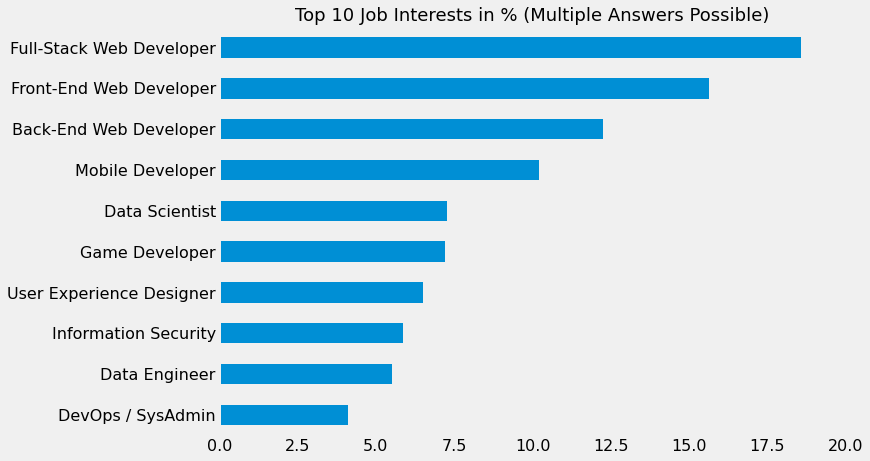

In [9]:
# Visualizing the top 10 Job Interests
%matplotlib inline
plt.style.use('fivethirtyeight')
ax = job_int_pcts.head(10).sort_values().plot.barh(
    figsize=(10, 7), fontsize=16)
ax.set_title(
    "Top 10 Job Interests in % (Multiple Answers Possible)", fontsize=18)
ax.set_xlim(0, 20)
plt.grid(False)

Most respondents were interested in some form of web development, Data Science and Game Development follows after that. So the sample should be representative enough for the target group. Since the main focus of the assumed company is web and mobile development let us see how much interests there is in those fields compared to other fields.

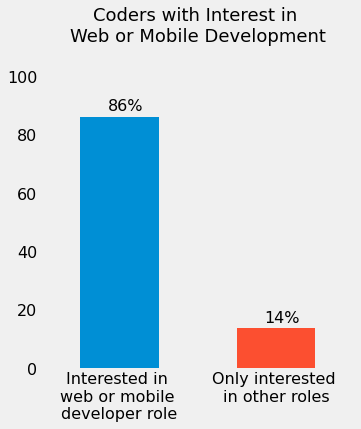

In [10]:
# Create column indicating if person is interested in web or mobile developer role
survey["InterestWebMobile"] = survey["JobRoleInterest"].apply(lambda x: any(
    [re.search(r"(web developer)|(mobile developer)", s, flags=re.IGNORECASE) for s in x]))

# Visualizing interest in web & mobile development versus other fields
per_table_web_moblile = survey["InterestWebMobile"].value_counts(
    normalize=True)*100

ax = per_table_web_moblile.plot.bar(
    figsize=(5, 5), fontsize=16, color=['C0', 'C1'])
ax.set_title(
    "Coders with Interest in \nWeb or Mobile Development", fontsize=18, y=1.1)
plt.xticks([0, 1], labels=["Interested in \nweb or mobile \ndeveloper role",
                           "Only interested \nin other roles"], rotation=0)
plt.grid(False)
i = 0
for index, value in per_table_web_moblile.iteritems():
    plt.text(i-0.075, value+2, str(round(value)) + "%", fontsize=16)
    i += 1
ax.set_ylim(0, 100)
plt.show()

A large majority of respondents (86%) was interested in either a web or mobile developer role, so there should be a clear demand for courses that prepare for these roles.

# Where are new coders located?
After we concluded that the sample has enough respondents of the right categories we can analyze which countries have the highest number of the target population.

In [11]:
print("Top 10 Countries with most respondents")
survey["CountryLive"].value_counts().head(10)

Top 10 Countries with most respondents


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

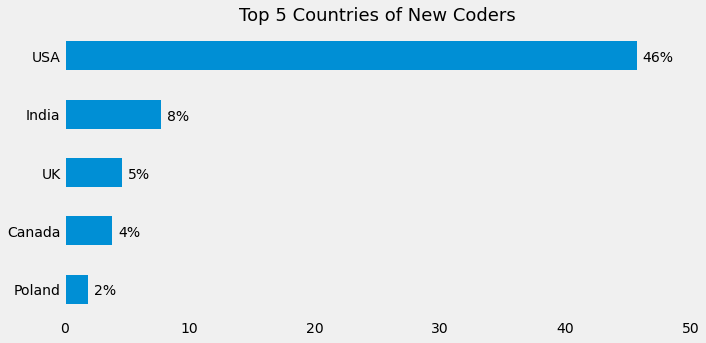

In [32]:
# Visualize Top 5 countries
country_t5_pct = survey["CountryLive"].value_counts(
    normalize=True).head(5).sort_values()*100
ax = country_t5_pct.plot.barh(figsize=(10, 5), fontsize=14)
ax.set_title("Top 5 Countries of New Coders", fontsize=18)
plt.grid(False)
ax.set_xlim((0, 50))
plt.yticks(range(0,5),["Poland","Canada","UK","India","USA"])
i = 0
for index, value in country_t5_pct.iteritems():
    plt.text(value+0.5, i-0.1, str(round(value)) + "%", fontsize=14)
    i += 1
plt.show()

Most respondents that indicated which job role they would be interested in come either from the USA (46%), India (8%), UK (5%) or Canada (4%).
Since English is an official language in all of these countries, they would be a good match to advertise in (assuming our courses are in English). Further analysis will determine if these countries actually have new coders that are also willing to pay for a monthly subscription (assuming $59).

# Which country has the most profitable new coders?
Profitable in this context is defined as new coders that would be willing to spent $59 per month on a subscription service to learn coding.

MoneyForLearning indicated the amount of USD spent on learning how to code *from the moment they started coding*. This means we should be able to infer an approximate amount each respondent was willing to pay *per month*.

In [13]:
# treat 0 months programming as 1 (else we will divide by 0 in the next step)
survey["Money/Month"] = survey["MoneyForLearning"] / \
    survey["MonthsProgramming"].replace(0, 1)

# how  many missing values for money/month?
count_na = survey["Money/Month"].isna().sum()
count_notna = survey["Money/Month"].notna().sum()
print("Missing values for money/month: " + str(count_na))
print("Cases with values for money/month: " + str(count_notna))

Missing values for money/month: 675
Cases with values for money/month: 6317


A bit more than 10% of cases did not indicate enough data to compute approximate money spent on learning to code per month. Thus, there should still be enough respondents remaining to conduct a meaningful analysis. Since the target variable for the next step is Money/Month, I will be filtering out all respondents with missing data for this variable. From here on I will only be analysing the 4 countries of interest, so I will also filter out all other countries.

In [14]:
# Filter out null values for Money/Month and countries that are not of interest
survey_filtered = survey[survey["Money/Month"].notna()]
mask = survey_filtered["CountryLive"].isin(
    ["United States of America", "India", "United Kingdom", "Canada"])
survey_filtered = survey_filtered[mask]

# Group by country and get avg. amount spent/month
country_group = survey_filtered.groupby("CountryLive")
print("Avg. USD spent on learning per country:\n")
print(
    round(country_group["Money/Month"].mean().sort_values(ascending=False), 2))

Avg. USD spent on learning per country:

CountryLive
United States of America    228.00
India                       135.10
Canada                      113.51
United Kingdom               45.53
Name: Money/Month, dtype: float64


These values look counter-intuitive: Canada and UK are *lower* than the values for India. Given the [GDP of these countries](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies) we should make sure that these values are not distorted.

## Filter out extreme outliers
The most likely explanation for distorted values are outliers so in this step I will check for those. For determining outliers we will look at the target distribution of respondents *willing to spend money on learning to code from the countries of interest*. Outliers will be defined with [Tukey's criteria for extreme outliers](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences): respondents scoring more than 3x the interquartile range (IQR) below the first or above the 3rd quartile.

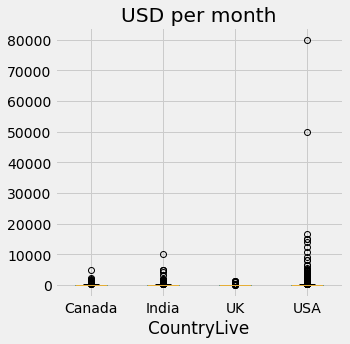

In [15]:
# Inspect outliers
mask = survey_filtered["Money/Month"] > 0

survey_paying = survey_filtered[mask]
survey_paying.boxplot(
    by="CountryLive", column="Money/Month", figsize=(5, 5))
plt.suptitle("")
# shorten country names to avoid overlap
plt.xticks(range(1, 5), ['Canada', 'India', 'UK', 'USA'])
plt.title('USD per month')
plt.show()

In [16]:
# Filter out extreme outliers (> Q3 + IQR x3 rule)
paying_no_out = pd.DataFrame()

countries = survey_paying["CountryLive"].unique()

for c in countries:
    df = survey_paying[survey_paying["CountryLive"] == c]
    q1 = df["Money/Month"].quantile(0.25)
    q2 = df["Money/Month"].median()
    q3 = df["Money/Month"].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3 + (IQR*3)
    df = df[df["Money/Month"] <= upper_bound]
    # Print out summary stats
    print("Summary for: {}:".format(c))
    print("Q1: {:.2f}".format(q1))
    print("Median: {:.2f}".format(q2))
    print("Q3: {:.2f}".format(q3))
    print("Upper bound (Q3 + IQRx3): ${:.2f}\n".format(upper_bound))
    paying_no_out = paying_no_out.append(df)

Summary for: United States of America:
Q1: 10.00
Median: 33.33
Q3: 166.67
Upper bound (Q3 + IQRx3): $636.67

Summary for: United Kingdom:
Q1: 8.33
Median: 20.83
Q3: 66.67
Upper bound (Q3 + IQRx3): $241.67

Summary for: Canada:
Q1: 8.33
Median: 25.00
Q3: 131.25
Upper bound (Q3 + IQRx3): $500.00

Summary for: India:
Q1: 5.50
Median: 20.00
Q3: 133.33
Upper bound (Q3 + IQRx3): $516.83



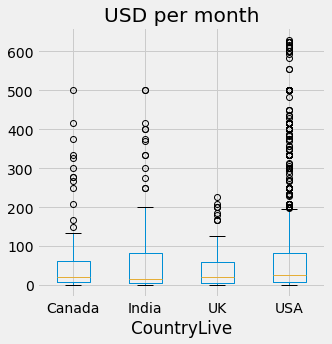

In [17]:
paying_no_out.boxplot(by="CountryLive", column="Money/Month", figsize=(5, 5))
plt.suptitle("")
# shorten country names to avoid overlap
plt.xticks(range(1, 5), ['Canada', 'India', 'UK', 'USA'])
plt.title('USD per month')
plt.show()

We have gotten rid of extreme values (some far over \\$1,000) that might have been the result of erroneous responses or extremely unrepresentative individuals, etc. At the same we kept individuals that are willing to pay very high amounts money per month ($200 and up), but should not be considered problematic data.

## Recompute Mean $/Month

In [18]:
country_group = paying_no_out.groupby("CountryLive")
spent_country = country_group["Money/Month"].mean().sort_values(ascending=False)
print("Approx. USD spent per month for learning (willing to spend money only):\n")
print(spent_country)

Approx. USD spent per month for learning (willing to spend money only):

CountryLive
United States of America    81.715355
India                       63.603843
Canada                      62.938478
United Kingdom              42.389582
Name: Money/Month, dtype: float64


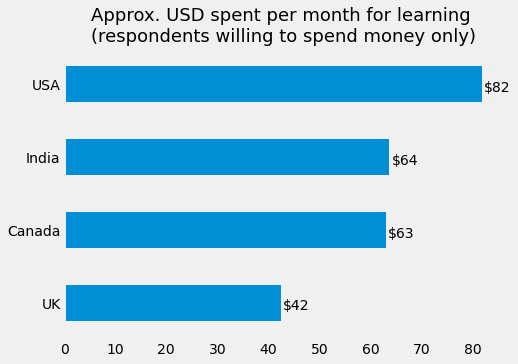

In [27]:
# Visualizing avg. amount spent/month for respondents willing to spend money
# sort so highest amount is on top for graph
spent_country = spent_country.sort_values()
ax = spent_country.plot.barh(figsize=(7, 5), fontsize=14)
ax.set_title(
    "Approx. USD spent per month for learning \n(respondents willing to spend money only)", fontsize=18)
plt.grid(False)
plt.yticks(range(0,4),["UK","Canada","India","USA"])
i = 0
for index, value in spent_country.iteritems():
    plt.text(value+0.5, i-0.1, "$" + str(round(value)), fontsize=14)
    i += 1
plt.ylabel("")
plt.show()

This suggests that potential customers from the USA are willing to spent more money than respondents from other markets. For India and Canada, however, the average amount respondents are willing to spend per month is almost identical (but in both cases above \\$59).
Respondents from the UK seem on average be willing to spent less than customers from other markets. The UK is therefore not recommended as a target market at this point, especially considering the fact that the average amount spent per month is below \\$59.

To help with picking India versus Canada as a target market, I will analyze in the next step how many respondents willing to pay the price point of the subscription (\\$59) come from each country.

In [20]:
country_group_above_59USD = paying_no_out[paying_no_out["Money/Month"]
                                          > 59].groupby("CountryLive")

print("Count of respondents paying $59/month or more on learning:\n")
print(
    country_group_above_59USD["Money/Month"].count().sort_values(ascending=False).head(5))

Count of respondents paying $59/month or more on learning:

CountryLive
United States of America    485
India                        53
United Kingdom               33
Canada                       26
Name: Money/Month, dtype: int64


India has almost twice as many potential customers willing to pay \\$59 or more per month to learn coding.

# Recommendations
* The USA should be an obvious choice as a primary target market: Customers from the USA are on average willing to pay more than customers from any other market and the survey suggests that they have by far the largest amount of potential customers
* For the second target market the choice should be between India and Canada. The available data favors India, but if possible domain knowledge and/or additional market research in these markets should be taken into consideration for this decision: Potential customers from India and Canada are on average spending about the same amount per month on learning how to code (\\$63 to \\$64). However, the survey suggests, that India has the larger amount of potential customers.